# 20224060 황지상

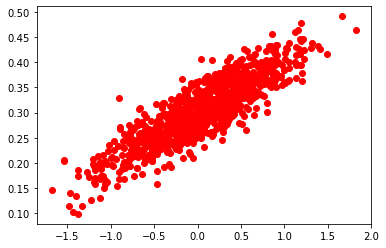

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## y = 0.1x + 0.3 관계를 갖는 가상 데이터를 생성
num_points = 1000 # 1000개의 데이터 쌍
vectors_set = []

np.random.seed(1) # 재 실행 시에도 동일한 데이터 생성을 위해 랜덤 시드 값 지정
for i in range(num_points):
    x = np.random.normal(0.0, 0.55) 
    # 평균 0, 표준편차 0.55를 갖는 정규분포의 난수 발생
    
    y = x*0.1+0.3+np.random.normal(0.0, 0.03)
    # 평균 0, 표준편차 0.03를 갖는 정규 분포를 갖는 난수의 편차 추가
    
    vectors_set.append([x,y])
    
# x,y 데이터 분리
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

# 데이터 분포 그림 그리기
plt.plot(x_data, y_data, 'ro', label = 'Original data')

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 파이토치 텐서 훈련 데이터 생성
x_train = torch.FloatTensor(x_data).unsqueeze(dim=1)
# unsqueeze(dim=1): (1000,) => (1000, 1)

y_train = torch.FloatTensor(y_data).unsqueeze(dim=1)

# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)
print(list(model.parameters()))

# optimizer 설정. 경사 하강법 SGD를 사용하고 학습 속도를 의미하는 lr은 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 전체 훈련 데이터에 대해 경사 하강법을 100회 반복
nb_epochs=100

for epoch in range(nb_epochs):
    # H(x) 계산
    prediction = model(x_train)
    
    # 손실함수 계산
    loss = F.mse_loss(prediction, y_train)
    
    # 역전파 수행
    optimizer.zero_grad() # 기울기(gradient)를 0으로 초기화
    loss.backward() # 손실함수를 미분하여 기울기 계산
    optimizer.step() # W와 b를 업데이트
    
    # 10번 반복마다 로그 출력
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} loss : {:.6}'.format(epoch, nb_epochs, loss.item()))

[Parameter containing:
tensor([[0.5441]], requires_grad=True), Parameter containing:
tensor([0.8854], requires_grad=True)]
Epoch    0/100 loss : 0.415263
Epoch   10/100 loss : 0.0208227
Epoch   20/100 loss : 0.00539479
Epoch   30/100 loss : 0.00215424
Epoch   40/100 loss : 0.00125578
Epoch   50/100 loss : 0.00100333
Epoch   60/100 loss : 0.000932362
Epoch   70/100 loss : 0.000912408
Epoch   80/100 loss : 0.000906798
Epoch   90/100 loss : 0.000905221


훈련 후 입력이 10일 때의 예측값 : tensor([[1.2879]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0987]], requires_grad=True), Parameter containing:
tensor([0.3008], requires_grad=True)]


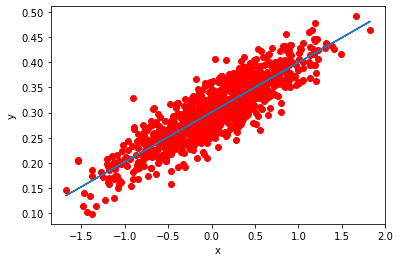

In [8]:
# 임의의 입력 10을 선언
new_var = torch.FloatTensor([[10.0]])

# 입력한 값 10에 대해서 예측값 y를 리턴받아서 pred_Y에 저장
pred_y = model(new_var) # 순천파 연산

# y = 0.1x + 0.3 이므로 입력이 10이라면 y가 1.3에 가까운 값이 
#나와야 제대로 학습이 된것
print("훈련 후 입력이 10일 때의 예측값 :", pred_y)

# 모델 파라미터 W, b 출력
print(list(model.parameters()))

# 데이터 분포와 추정된 직선 그리기
plt.plot(x_data, y_data, 'ro') # 데이터 분포
plt.plot(x_data, model(x_train).detach().numpy()) # 직선
plt.xlabel('x') # x축 라벨
plt.ylabel('y') # y축 라벨
plt.show()